In [45]:
import os
from PIL import Image, ImageDraw
from random import sample, choices

COL = 5 #指定拼接图片的列数
ROW = 5 #指定拼接图片的行数
UNIT_HEIGHT_SIZE = 200 #图片高度
UNIT_WIDTH_SIZE = 200 #图片宽度
PATH = "" #需要拼接的图片所在的路径
NAME = "" #拼接出的图片保存的名字
RANDOM_SELECT = False #设置是否可重复抽取图片
SAVE_QUALITY = 50 #保存的图片的质量 可选0-100

In [46]:
def concat_images(selected_images):
    # 创建一个标签文件
    with open("/datassd2/sswang/image_matching/data_augmentations/utils/tests/grid_label.txt", 'w') as f:
    #进行图片的复制拼接
        image_files = []
        #读取所有用于拼接的图片
        for index in selected_images:
            image_files.append(Image.open(index).resize((UNIT_HEIGHT_SIZE, UNIT_WIDTH_SIZE),Image.ANTIALIAS))
        #创建成品图的画布
        #第一个参数RGB表示创建RGB彩色图，第二个参数传入元组指定图片大小，第三个参数可指定颜色，默认为黑色
        concat_image = Image.new('RGB', (UNIT_WIDTH_SIZE * COL, UNIT_HEIGHT_SIZE * ROW))
        # 将图片以中心和边界值分解成网格
        grid_col = COL * 2
        grid_row = ROW * 2
        width = 1 / COL
        height = 1 / ROW
        for row in range(ROW):
            for col in range(COL):
                #对图片进行逐行拼接
                #paste方法第一个参数指定需要拼接的图片，第二个参数为二元元组（指定复制位置的左上角坐标）
                #或四元元组（指定复制位置的左上角和右下角坐标）
                concat_image.paste(image_files[COL*row+col], (UNIT_WIDTH_SIZE*col, UNIT_HEIGHT_SIZE*row))
                temp_label = (0, (col * 2 +1) / grid_col , (row * 2 + 1) / grid_row, width, height)
                str_ = str(temp_label[0])
                for item in temp_label[1:]:
                    str_ = str_ + " " + str(item)
                f.write(str_)
                f.write("\n")
    f.close()
    return concat_image
    # display(concat_image) #显示成品图


/tmp/ipykernel_23026/2991797772.py:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image_files.append(Image.open(index).resize((UNIT_HEIGHT_SIZE, UNIT_WIDTH_SIZE),Image.ANTIALIAS))


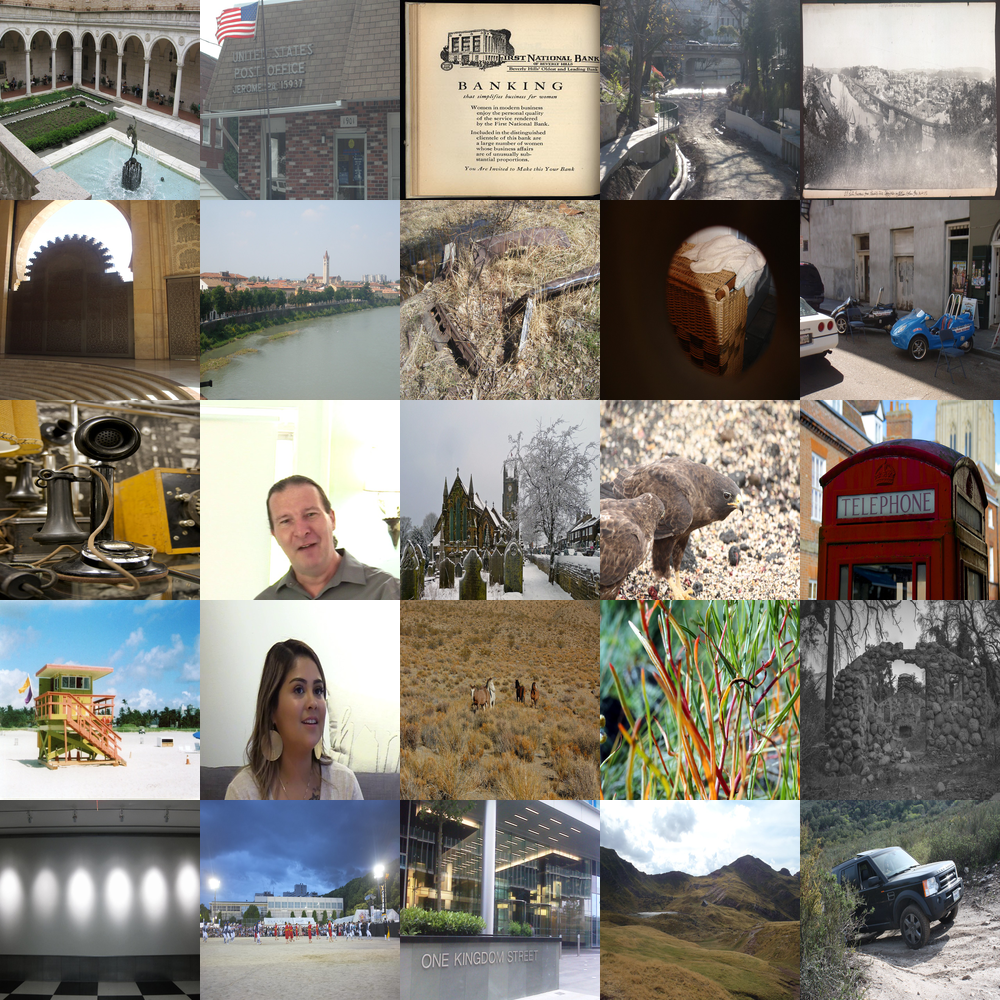

In [47]:
img_base_path = "/datassd2/sswang/image_matching/data/isc_data/training_imgs/training"
img_file_list= os.listdir(img_base_path)
# print(img_file_list[:10])
selected_images = [os.path.join(img_base_path, img_name) for img_name in sample(img_file_list, COL*ROW)]
# print(img_file_list[:10])
concat_image = concat_images(selected_images)
display(concat_image)

In [33]:
f = open( '/datassd2/sswang/image_matching/data_augmentations/utils/tests/grid_label.txt', 'r' )
for line in f.readlines():
    print(line)

0 0.5 0.16666666666666666 1.0 0.3333333333333333

0 0.5 0.5 1.0 0.3333333333333333

0 0.5 0.8333333333333334 1.0 0.3333333333333333



In [43]:
# 将YOLO标签画出来
def draw_yolo_rectangle_fromtxt(yolo_label_file, img):
    draw = ImageDraw.Draw(img)
    for label in yolo_label_file.readlines():
        # print(label)
        # 将字符串label转化为float类型
        label = map(float, label.split(" "))

        # 读取YOLO标签
        _, x, y, width, height = label
        bg_width, bg_height = img.size

        # 将YOLO标签转化为ImageDraw.Draw.rectangle()方法支持的输入格式
        over_width = bg_width * width
        over_height = bg_height * height
        point1_xpos = bg_width * x - over_width / 2
        point1_ypos = bg_height * y - over_height / 2
        point2_xpos = point1_xpos + over_width
        point2_ypos = point1_ypos + over_height

        draw.rectangle([(point1_xpos, point1_ypos), (point2_xpos,
                        point2_ypos)], fill=None, outline="red", width=2)
    return img

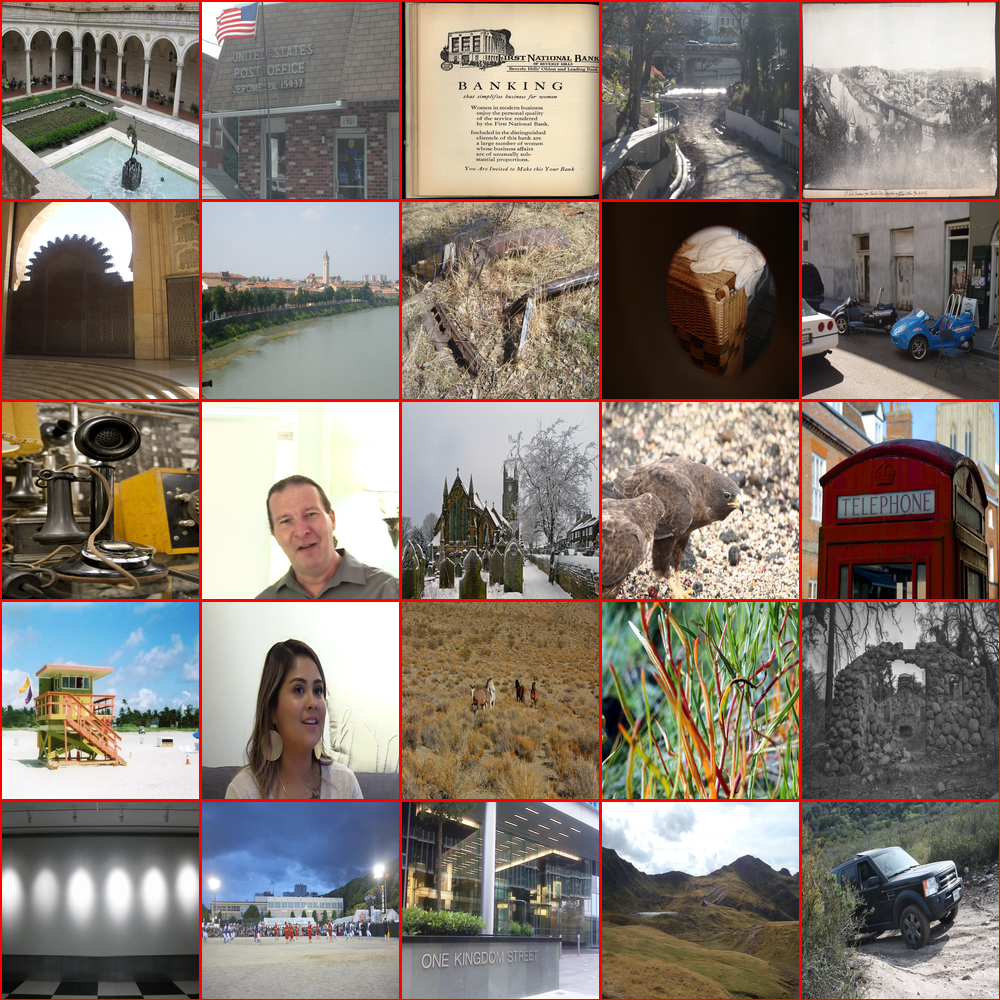

In [48]:
f = open( '/datassd2/sswang/image_matching/data_augmentations/utils/tests/grid_label.txt', 'r' )
labeled_img =  draw_yolo_rectangle_fromtxt(f, concat_image)
display(labeled_img)

In [17]:
str1 = "0 0.8333333333333334 0.8333333333333334 0.3333333333333333 0.3333333333333333".split(" ")
list1 = map(float, str1)

a, b, c, d, e = list1
print(a, b, c, d, e)


# print(type(list1))
# for item in list1:
#     print(type(item), item)

# # print(float(str1))

0.0 0.8333333333333334 0.8333333333333334 0.3333333333333333 0.3333333333333333


In [16]:
import sys
import os
import random
from PIL import Image
sys.path.append('/datassd2/sswang/image_matching/data_augmentations/utils/')
from data_augmentation_for_yolo_training import final_aug_


overlay_img_path = '/datassd2/sswang/image_matching/data/isc_data/training_imgs/training/'
overlay_img_list = os.listdir(overlay_img_path)

output_base_path = '/datassd2/sswang/image_matching/data/test_output/'

def concat_images(img_list, label_file, col, row, width, height):

    """
        将图片拼接成一个大图
    Args:
        img_list: 图片列表
        col: 拼接的列数
        row: 拼接的行数
        width: 用于拼接的单张图片的宽度
        height: 用于拼接的单张图片的高度

    Returns:
        objs: 返回拼接后的图片和标签
    """
    
    # 更改用拼接的图片大小

    for index in range(len(img_list)) :
        img_list[index] = img_list[index].resize((width, height), Image.BICUBIC)

    # for img in img_list:
    #     print("传进来的图片，修改尺寸")
    #     display(img)

    img_list = [index.resize((width, height), Image.BICUBIC) for index in img_list]
    for img in img_list:
        print("传进来的图片，修改尺寸")
        display(img)

    #创建成品图的画布
    #第一个参数RGB表示创建RGB彩色图，第二个参数传入元组指定图片大小，第三个参数可指定颜色，默认为黑色
    concat_image = Image.new('RGB', (width * col, height * row), (255, 228, 17))
    # 将图片以中心和边界值分解成网格
    grid_col = col * 2
    grid_row = row * 2
    label_width = 1 / col
    label_height = 1 / row
    for item_row in range(row):
        for item_col in range(col):
            #对图片进行逐行拼接
            #paste方法第一个参数指定需要拼接的图片，第二个参数为二元元组（指定复制位置的左上角坐标）
            #或四元元组（指定复制位置的左上角和右下角坐标）
            concat_image.paste(img_list[col * item_row + item_col], (width * item_col, height * item_row))
            display("阶段性展示",concat_image)
            temp_label = (0, (item_col * 2 + 1) / grid_col , (item_row * 2 + 1) / grid_row, label_width, label_height)
            str_ = str(temp_label[0])
            for item in temp_label[1:]:
                str_ = str_ + " " + str(item)
            label_file.write(str_)
            label_file.write("\n")
    return concat_image
    # display(concat_image) #显示成品图



def generate_grid_img(height = 512, width = 512, aug_level= 0,  folder_name='train', index=0):
    """
        生成网格图片

    Args:
        height (int, optional): _description_. 最终生成的网格图的高度，Defaults to 512.
        width (int, optional): _description_. 网格图的宽度 Defaults to 512.
        aug_level (int, optional): _description_. 图像增强等级 Defaults to 0.
        folder_name (str, optional): _description_.用于保存文件的文件夹 Defaults to 'train'.
        index (int, optional): _description_. Defaults to 0.
    """

    # 生成网格的行数和列数
    col = random.randint(1, 2)
    row = random.randint(1, 2)
    # 一行一列的情况就是对应单张图片，这时候默认让列数为2
    if col * row == 1:
        col = 2
    print("col: {}, row: {}".format(col, row))

    # 选出用于拼接的图片列表
    selected_images = [os.path.join(overlay_img_path, img_name) for img_name in random.sample(overlay_img_list, col * row)]
    img_list = [Image.open(img) for img in selected_images]
    for img in img_list:
        print("选出来的图片")
        display(img)

    # 生成存放标签的文件
    label_name = 'Aug_New_Gride{}.txt'.format(index)
    label_file = open(os.path.join(output_base_path, folder_name, "labels", label_name), 'w')

    # 生成网格图片 和 对应的标签
    concat_image = concat_images(img_list = img_list, label_file = label_file, col = col, row = row, width=150, height=150)
    label_file.close()
    display(concat_image)
    print(type(concat_image))

    # 构造数据增强对象
    final_aug = final_aug_(aug_level=aug_level)

    # 对网格图进行数据增强
    # final_img = final_aug(concat_image).resize((width, height), Image.BICUBIC)
    final_img = final_aug(concat_image)
    print(type(final_img))
    # Image.ANTIALIAS
    display(final_img)

    # 存储增强之后的图片和标签
    img_name = 'Aug_New_Gride{}.jpg'.format(index)
    concat_image.save(os.path.join(output_base_path, folder_name, "images", img_name))
    print("{} saved".format(img_name))

col: 2, row: 1
选出来的图片


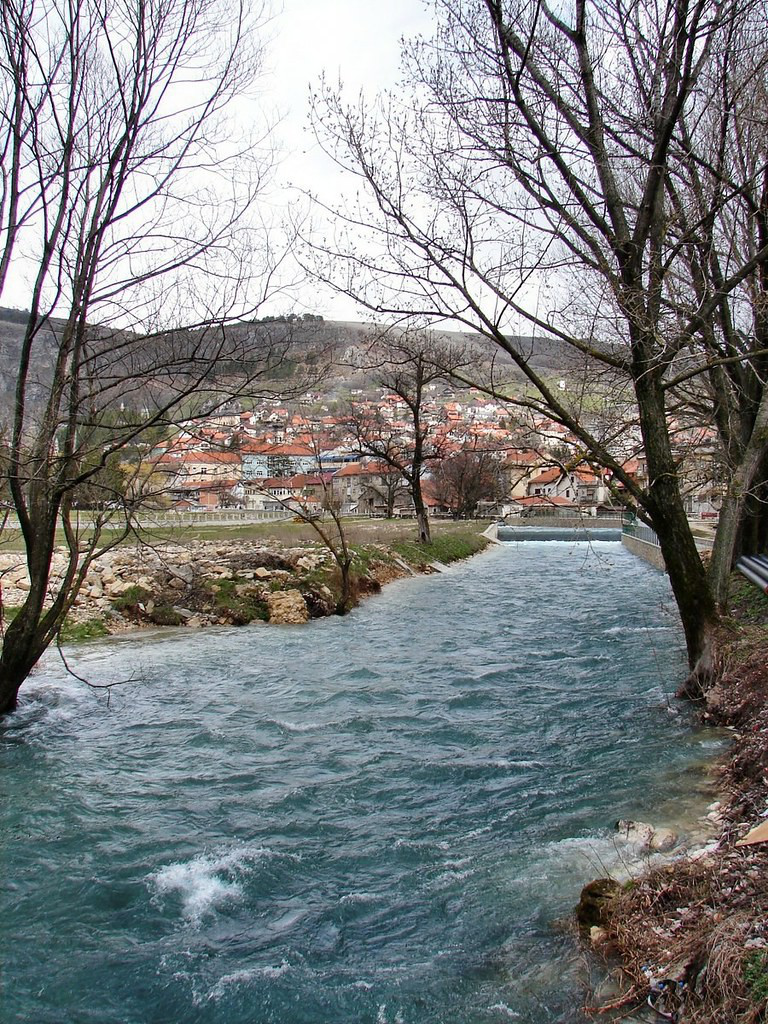

选出来的图片


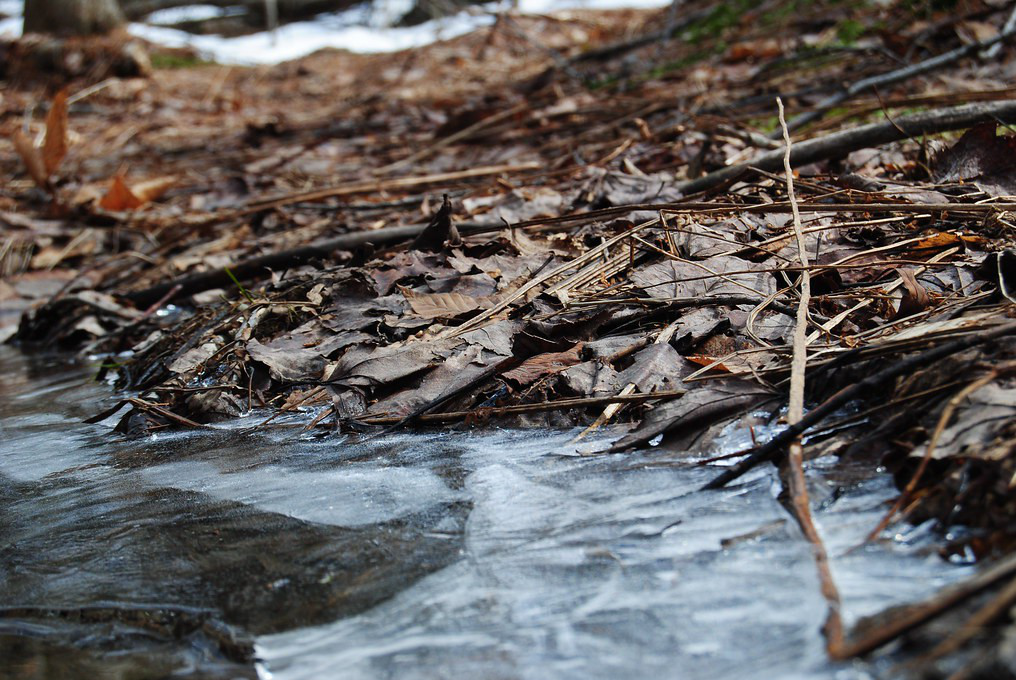

传进来的图片，修改尺寸


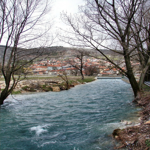

传进来的图片，修改尺寸


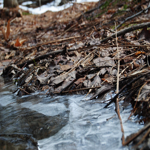

'阶段性展示'

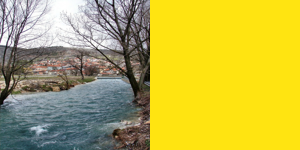

'阶段性展示'

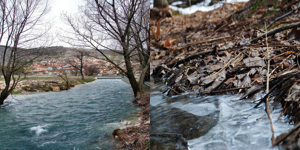

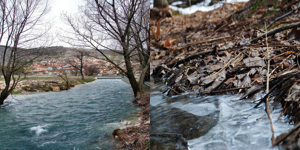

<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>


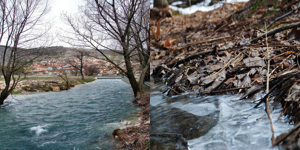

Aug_New_Gride10.jpg saved


In [17]:
generate_grid_img(index = 10)